In [5]:
!pip freeze

absl-py==2.1.0
accelerate==1.2.0
asttokens==3.0.0
astunparse==1.6.3
certifi==2024.8.30
charset-normalizer==3.4.0
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.9
decorator==5.1.1
executing==2.1.0
filelock==3.16.1
flatbuffers==24.3.25
fonttools==4.55.3
fsspec==2024.10.0
gast==0.6.0
google-pasta==0.2.0
grpcio==1.68.1
h5py==3.12.1
huggingface-hub==0.26.5
idna==3.10
ipykernel==6.29.5
ipython==8.30.0
jedi==0.19.2
Jinja2==3.1.4
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
keras==3.7.0
kiwisolver==1.4.7
libclang==18.1.1
Markdown==3.7
markdown-it-py==3.0.0
MarkupSafe==3.0.2
matplotlib==3.9.3
matplotlib-inline==0.1.7
mdurl==0.1.2
ml-dtypes==0.4.1
mpmath==1.3.0
namex==0.0.8
nest-asyncio==1.6.0
networkx==3.4.2
numpy==2.0.2
opt_einsum==3.4.0
optree==0.13.1
packaging==24.2
pandas==2.2.3
parso==0.8.4
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
protobuf==5.29.1
psutil==6.1.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.po

In [6]:
import numpy as np
import pandas as pd 
dataset = pd.read_csv('modified_dataset.csv')

In [7]:
dataset

,judgment,summary,preprocessed_text
0,Appeal No. LXVI of 1949. Appeal from the High ...,The charge created in respect of municipal pro...,appeal number lxvi of 1949. appeal from the hi...
1,Civil Appeal No.94 of 1949. 107 834 Appeal fro...,"An agreement for a lease, which a lease is by ...",civil appeal no.94 of 1949. 107 834 appeal fro...
2,"iminal Appeal No. 40 of 1951, 127 Appeal from ...","The question whether a Magistrate is ""personal...","iminal appeal number 40 of 1951, 127 appeal fr..."
3,Appeal No. 388 of 1960. Appeal by special leav...,The appellant was a member of a joint Hindu fa...,appeal number 388 of 1960. appeal by special l...
4,Appeal No. 198 of 1954. Appeal from the judgme...,The appellant was the Ruler of the State of Ba...,appeal number 198 of 1954. appeal from the jud...
...,...,...,...
7123,Appeal No. 1367 of 1980. From the Judgment and...,Proceedings were commenced under Chapter III B...,appeal number 1367 of 1980. from the judgment ...
7124,Appeal No. 1695 of 1993. From the Judgment and...,"The plaintiff, predecessor in interest of the ...",appeal number 1695 of 1993. from the judgment ...
7125,iminal Appeal No. 46 of 1957. Appeal by specia...,Conciliation proceedings were started in Janua...,iminal appeal number 46 of 1957. appeal by spe...
7126,N: Criminal Appeal No. 8 of 1951. Appeal from ...,Sub section (1) of sec.\n19 of the Bombay Rent...,n: criminal appeal number 8 of 1951. appeal fr...


In [8]:
X = list(dataset['preprocessed_text'])
y = list(dataset['summary'])

In [9]:

len_list = []
for x in X:
    len_list.append(len(x))
print(len(len_list))


7128


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([7.13000000e+02, 7.94066000e+02, 8.75132000e+02, ...,
        8.11210868e+05, 8.11291934e+05, 8.11373000e+05]),
 <BarContainer object of 10000 artists>)

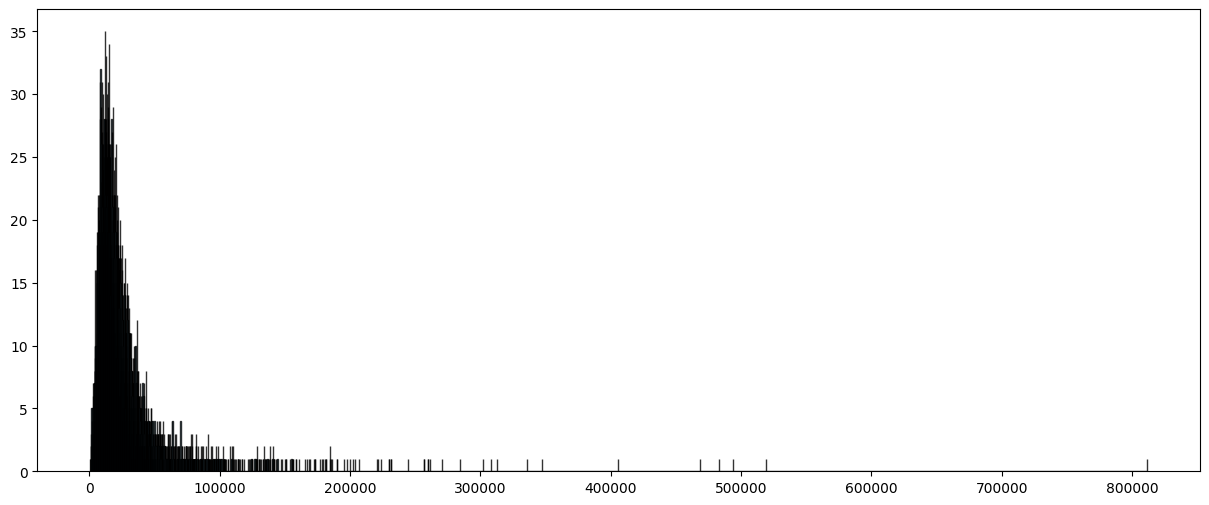

In [10]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 6))
plt.hist(len_list, bins=10000, color='skyblue', edgecolor='black', alpha=0.8)

In [11]:
X_temp = []
y_temp = []
for i in range(len(X)):
    if len(X[i]) <=10000:
        X_temp.append(X[i])
        y_temp.append(y[i])

print(len(X_temp))

1328


In [12]:
X = X_temp
y = y_temp


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from transformers import BartForConditionalGeneration, BartTokenizer

model_name = "facebook/bart-large-cnn"

# Load model and tokenizer with no progress bar
model = BartForConditionalGeneration.from_pretrained(model_name)
tokenizer = BartTokenizer.from_pretrained(model_name, use_progress_bar=False)

print("Model and tokenizer loaded successfully!")


RuntimeError: Failed to import transformers.models.bart.modeling_bart because of the following error (look up to see its traceback):
No module named 'distutils'

In [16]:
!pip install distutils

ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [12]:
train_encoding = tokenizer(X_train,max_length=1024,truncation=True, padding="max_length" )
test_encoding = tokenizer(X_test ,max_length= 1024,truncation=True, padding="max_length")

In [13]:
len(train_encoding['input_ids'][0])

1024

In [14]:
len(test_encoding['attention_mask'][0])

1024

In [15]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encoding),
    y_train
))


test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encoding),
    y_test
))


2024-12-06 11:29:45.116025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-06 11:29:45.177212: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14152 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:65:00.0, compute capability: 8.6


In [16]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__


('4.46.3', '1.1.1')

In [17]:
train_dataset

<TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(1024,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(1024,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.string, name=None))>

In [27]:
# from transformers import TrainingArguments

# training_args = TrainingArguments(
#     output_dir = "./our-model",
#     learning_rate=2e-5,
#     per_device_train_batch_size= 64,
#     per_device_eval_batch_size = 16,
#     num_train_epochs = 2,
#     weight_decay = 0.01,
#     evaluation_strategy = "epoch",
#     save_strategy = "epoch",
#     load_best_model_at_end = True,
#     push_to_hub = False
# )

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,  # Adjust as needed
    per_device_train_batch_size=4,
    per_device_eval_batch_size= 4,
    warmup_steps=500,
    weight_decay = 0.01,
    logging_dir="./logs",
    logging_steps=1000,

    # save_steps=10_000,
    # save_total_limit=2,
    # evaluation_strategy="epoch",
)

In [25]:
import torch
torch.cuda.empty_cache()

In [28]:
from transformers import Trainer
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = test_dataset
)

trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 15.73 GiB of which 33.25 MiB is free. Including non-PyTorch memory, this process has 15.46 GiB memory in use. Of the allocated memory 1.48 GiB is allocated by PyTorch, and 10.17 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [60]:
trainer.evaluate(test_dataset)



NameError: name 'trainer' is not defined